# Telecom Churn Prediction

### Company Introduction
Your client for this project is a Telecom Service Provider called **WeConnect**.

- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- The objective is to use the model to take further actions for preventing customers to churn.
- They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.


### Current Scenario
- Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

### Problems:

- Due to the boom in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is **plausible** for customers to choose **4G services over 3G services** due to benefits of **cost, speed, latency** etc.

### Goal:
- You are given datasets of past customers and their status (Churn: Yes or No).
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Importing the Data

In [205]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report

In [206]:
#Importing Dataset
churn_data = pd.read_csv("Churn_train.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


| Column Name | Description |
| :- | :- |
| CustomerID	| Passenger Identity |
| Gender	| Whether the customer is a male or a female |
| SeniorCitizen	| Whether the customer is a senior citizen or not (1, 0) |
| Partner	| Whether the customer has a partner or not (Yes, No) |
| Dependents	| Whether the customer has dependents or not (Yes, No) |
| Tenure	| Number of months the customer has stayed with the company |
| PhoneService	| Whether the customer has a phone service or not (Yes, No) |
| MultipleLines	| Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService	| Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity	| Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup	| Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection	| Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport	| Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV	| Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies	| Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract	| The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling	| Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod	| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges	| The amount charged to the customer monthly |
| TotalCharges	| The total amount charged to the customer |
|Churn	| Whether the customer churned or not (Yes or No) |

### Understanding the Data

In [207]:
churn_data.shape

(5634, 21)

In [208]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [209]:
#Checking if any values in the variables are null 
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [210]:
columns = churn_data.columns
for i in columns:
    print(str(i)+"'s Unique count "+str(len(churn_data[str(i)].unique())))
    print(f"{churn_data[str(i)].unique()}\n")

customerID's Unique count 5634
['5442-PPTJY' '6261-RCVNS' '2176-OSJUV' ... '8868-WOZGU' '1251-KRREG'
 '5840-NVDCG']

gender's Unique count 2
['Male' 'Female']

SeniorCitizen's Unique count 2
[0 1]

Partner's Unique count 2
['Yes' 'No']

Dependents's Unique count 2
['Yes' 'No']

tenure's Unique count 73
[12 42 71 30  9 72 28  6 47 22  2  3  4 60 69 26 33  8 27 25 23 34 59 66
  5 45 49 24  1 40 51 68 32 44 67 11 53  7 55 31 13 63 64 10 62 35 57 20
 65 18 46 29 37 48 15 61 14 70 52 54 19 50 43 16 36 38 56 17 41 39 58 21
  0]

PhoneService's Unique count 2
['Yes' 'No']

MultipleLines's Unique count 3
['No' 'Yes' 'No phone service']

InternetService's Unique count 3
['No' 'DSL' 'Fiber optic']

OnlineSecurity's Unique count 3
['No internet service' 'Yes' 'No']

OnlineBackup's Unique count 3
['No internet service' 'Yes' 'No']

DeviceProtection's Unique count 3
['No internet service' 'Yes' 'No']

TechSupport's Unique count 3
['No internet service' 'Yes' 'No']

StreamingTV's Unique count 3
['No

### Data Pre-processing

In [211]:
#Total Charge is string but should be float
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [214]:
# NA rows will be filled with Mean of TotalCharges column
churn_data['TotalCharges'].fillna(value=churn_data['TotalCharges'].mean(), inplace=True)

In [216]:
#Tenure is int but should be float
churn_data['tenure'] = churn_data['tenure'].astype(float)

In [217]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42.0,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30.0,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [218]:
#Renaming values in PaymentMethod to simple terms, will be useful for encoding in future
payment_column = {'Electronic Check':'E-Check', 'Mailed check':'Mailed Check', 'Bank transfer (automatic)':'Bank Transfer','Credit card (automatic)':'Credit Card'}
churn_data.PaymentMethod.replace(payment_column,inplace=True)

### Exploratory Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

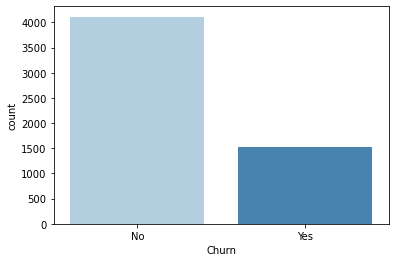

In [219]:
#Frequency distributio nof Chrun column
sns.countplot(x=churn_data['Churn'], palette='Blues', linewidth =1)

The distribution seems imbalance

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

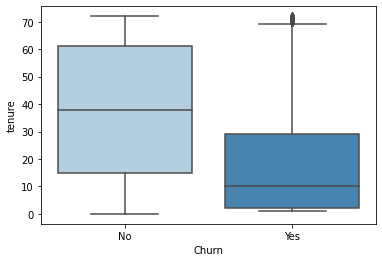

In [220]:
#Need to do boxplot between Churn and Tenure, MonthlyCharges, TotalCharges column
sns.boxplot(x=churn_data['Churn'], y=churn_data['tenure'], palette='Blues')

Insight : Users with lower tenure are the churning customers

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

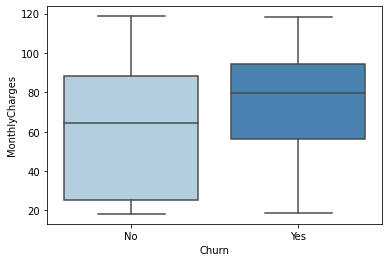

In [221]:
sns.boxplot(x=churn_data['Churn'], y=churn_data['MonthlyCharges'], palette='Blues')

Insight : Churning customers have high Monthly Charges. Their Interquartile range is lesser that non-chruning customers

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

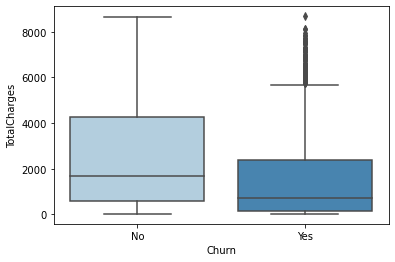

In [222]:
sns.boxplot(x=churn_data['Churn'], y=churn_data['TotalCharges'], palette='Blues')

Insight : Total Charges are a result of Tenure and Monthly Charges

In [223]:
#Checking for outlier in Numerical features, Will be usefull to decide scaling.
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
churn_num = churn_data[numerical_features]
churn_num.describe()

Q1 = churn_num.quantile(0.25)
Q3 = churn_num.quantile(0.75)
IQR = Q3 - Q1
((churn_num<(Q1 - 1.5*IQR)) | churn_num>(Q3 + 1.5*IQR)).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No Outliers in numerical features hence no adjustment made.

### Feature Engineering

In [224]:
#customerID is unique value column and add no sense to data. Hence removed
churn_data.drop(columns ='customerID', inplace=True)

#### Label Encoding

In [225]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed Check,19.70,258.35,No
1,Female,0,No,No,42.0,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit Card,73.90,3160.55,Yes
2,Male,0,Yes,No,71.0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank Transfer,65.15,4681.75,No
3,Male,0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,Male,0,No,No,30.0,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [226]:
#Features requires label encoding
label_features = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes':1, 'No':0})
    

label_encoding(label_features,churn_data)
churn_data['gender'] = churn_data['gender'].map({'Female':1,'Male':0})


In [227]:
#Features requires one hot encoding
ohe_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaymentMethod']

churn_data = pd.get_dummies(churn_data,columns=ohe_features, drop_first=True)

In [228]:
# We need to scale Tenure, Monthly Charges and Total Charges
# We will use min max scaling since there are not outliers as seen before.
from sklearn.preprocessing import MinMaxScaler
mms_features = ['tenure','MonthlyCharges','TotalCharges']

df_feature_mms = pd.DataFrame(churn_data, columns=mms_features)
df_remaining_features = churn_data.drop(columns=mms_features)

minmaxscaler = MinMaxScaler()
rescaled_features =  minmaxscaler.fit_transform(df_feature_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)

churn_data_scaled = pd.concat([df_remaining_features, df_rescaled_features], axis = 1)



In [229]:
churn_data_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic check,PaymentMethod_Mailed Check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0.166667,0.014442,0.027643
1,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0.583333,0.554283,0.362538
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0.986111,0.467131,0.538074
3,0,0,1,1,1,0,0,0,1,0,...,0,1,1,0,0,1,0,0.986111,0.669323,0.724908
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0.416667,0.519422,0.233781


Text(0.5, 1.0, 'Correlation between features')

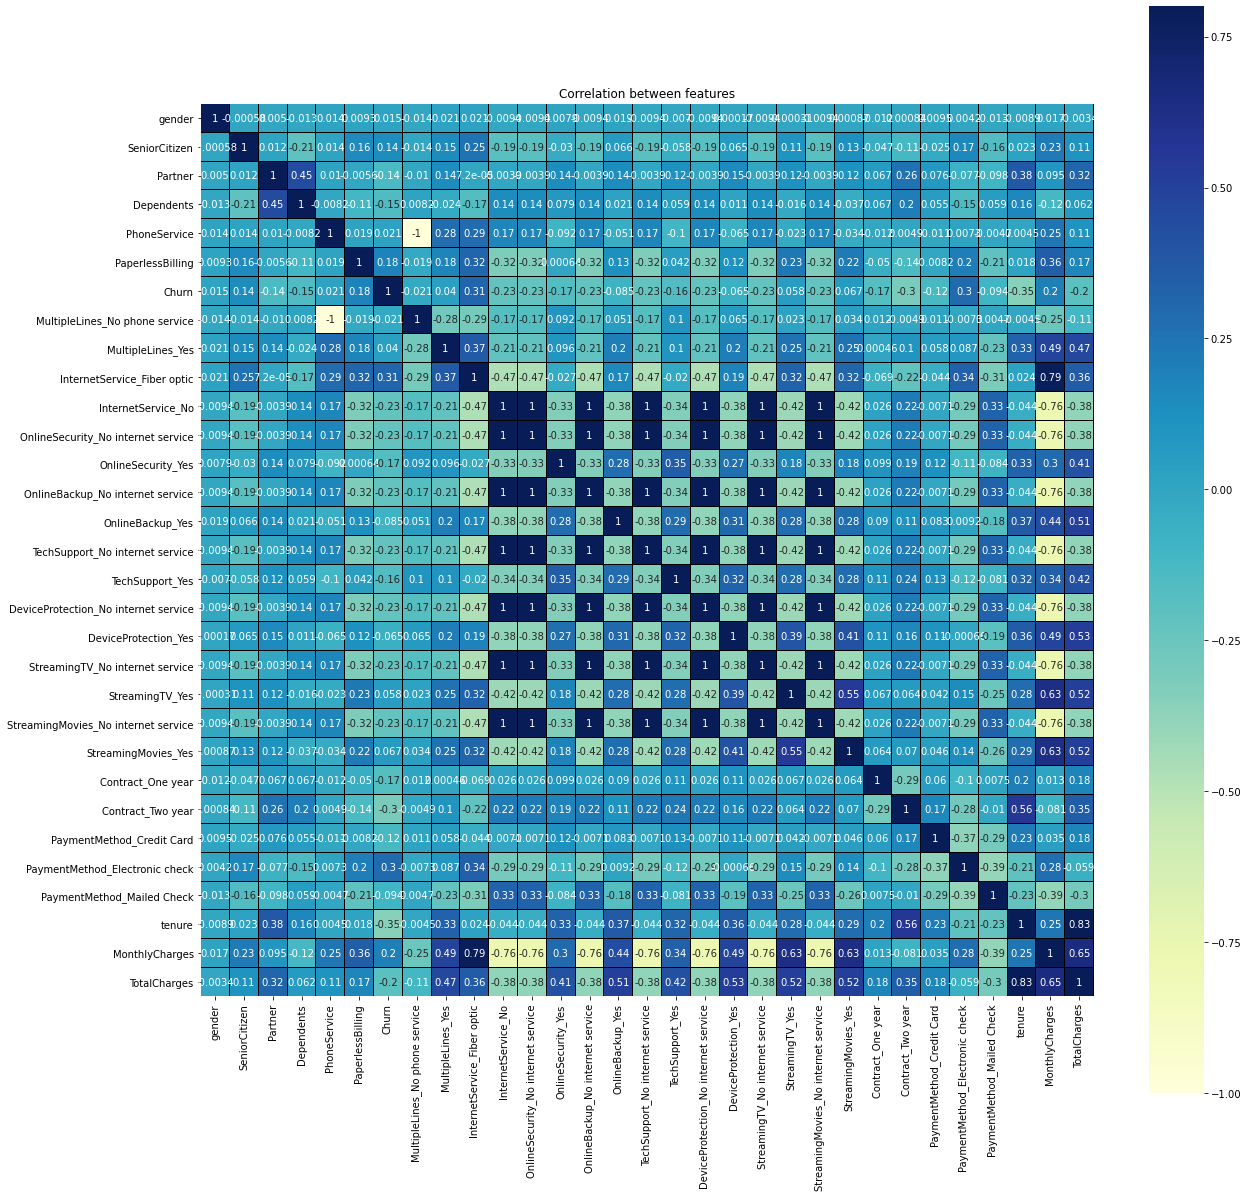

In [230]:
# Correlation
corr = churn_data_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')


There is correlation or we can say redundacny between following columns
InternetService_No vs OnlineSecurity_No internet service, OnlineBackup_No internet service, TechSupport_No internet service, DeviceProtection_No internet service, StreamingTV_No internet service, StreamingMovies_No internet service

There is a negative correlation exist between 
PhoneService and MultipleLines_No phone service

There is a strong correlation between MonthlyCharges vs InternetService_Fiber optic and 
TotalCharges vs tenure



Hence removing all positive and negative correlated column and removing TotalCharges and MonthlyCharges columns

In [231]:
churn_data_scaled.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit Card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed Check', 'tenure', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [232]:
#Removing redundant columns
churn_data_scaled.drop(columns =['OnlineSecurity_No internet service','OnlineBackup_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service','MultipleLines_No phone service','MonthlyCharges','TotalCharges'], inplace=True)

Text(0.5, 1.0, 'Correlation between features')

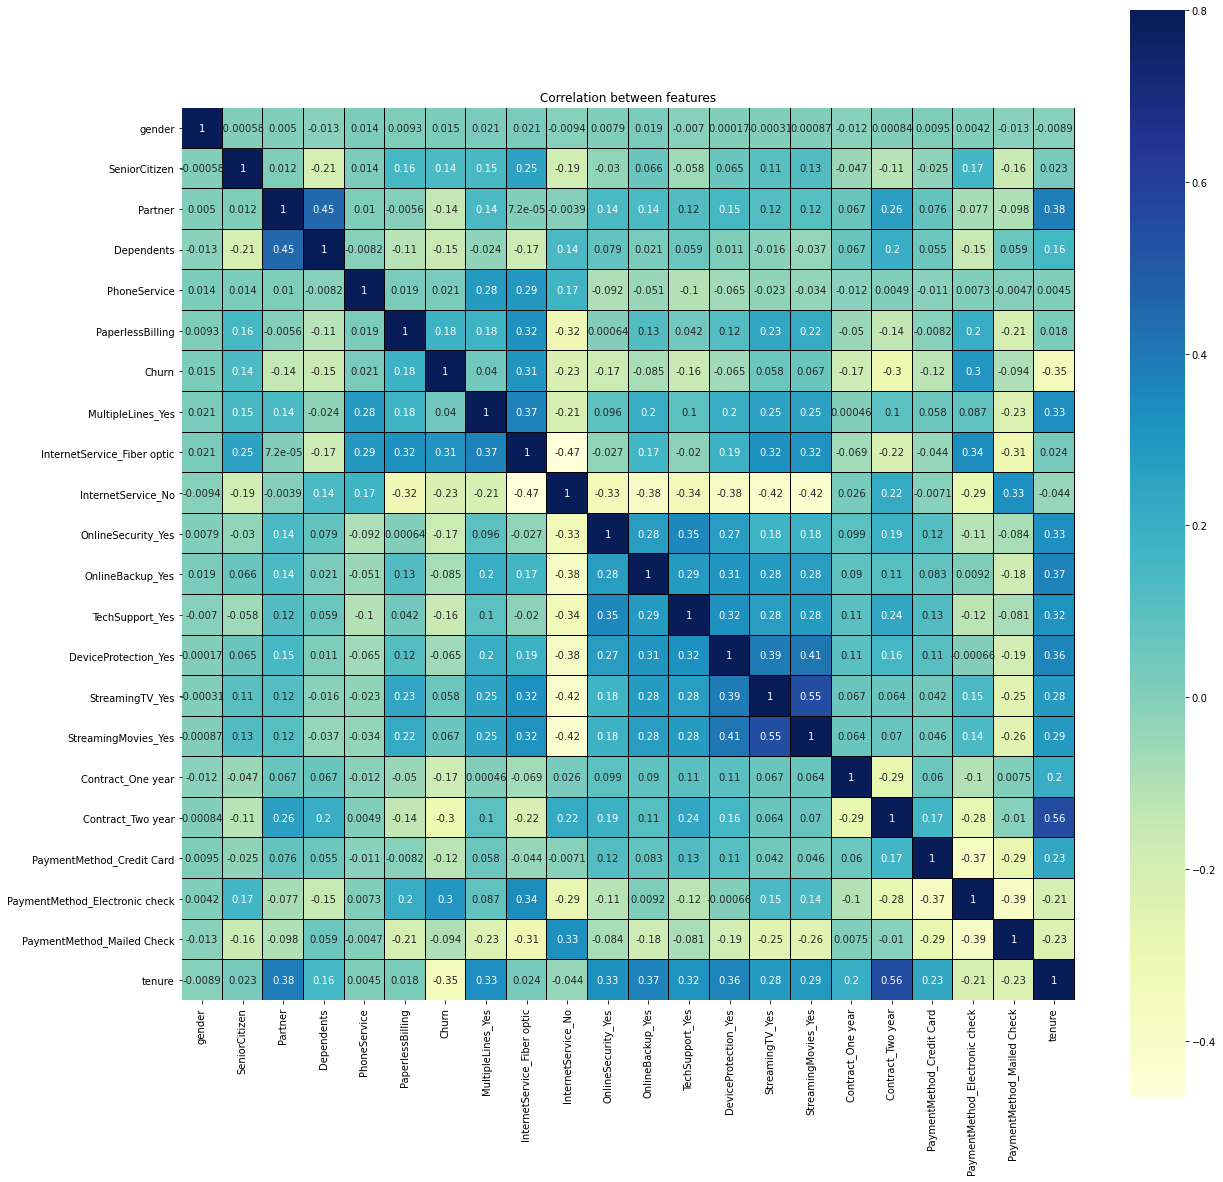

In [233]:
# Correlation
corr = churn_data_scaled.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [234]:
#We'll proceed with TrainTestSplit without removing any column.
X = churn_data_scaled.loc[:,churn_data_scaled.columns != 'Churn']
y = churn_data_scaled.Churn

In [235]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [236]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [237]:
#Logistic Regression Model prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [238]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score
print(' Accuracy '+ str(accuracy_score(y_train,y_pred_train)))
cf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

 Accuracy 0.8031950299534059


In [239]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score
print(' Accuracy '+ str(accuracy_score(y_test,y_pred_test)))

 Accuracy 0.8074534161490683


In [240]:
from sklearn import metrics
model_score = logreg.score(X_test, y_test)
print(model_score)
cf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

0.8074534161490683


<AxesSubplot:>

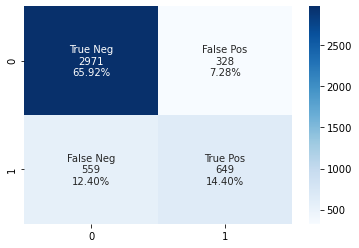

In [241]:
#Confustion Matrix for train
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

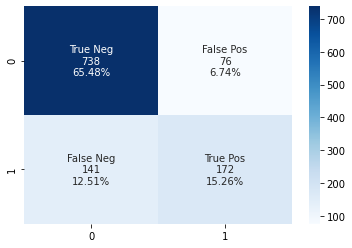

In [242]:

#Confution Matrix for Test 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [243]:
#Classification report
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       814
           1       0.69      0.55      0.61       313

    accuracy                           0.81      1127
   macro avg       0.77      0.73      0.74      1127
weighted avg       0.80      0.81      0.80      1127



In [244]:
test_churn = pd.DataFrame(data=(y_pred_test))

In [245]:
test_churn

,0
0,0
1,0
2,0
3,1
4,0
...,...
1122,0
1123,0
1124,0
1125,1


Accuracy Score 0.8031950299534059 which is almost 80% . 

### Importing Test DataSet  and using the Logistic Regression Model for prediction

In [246]:
#Importing TestDataset
churn_data_test = pd.read_csv("Churn_test.csv")
churn_data_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [247]:
#Cleaning the data as we did with train set
churn_data_test.shape

(1409, 20)

In [248]:
#Checking if any values in the variables are null 
churn_data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [249]:
#Total Charge is string but should be float
churn_data_test['TotalCharges'] = pd.to_numeric(churn_data_test['TotalCharges'], errors='coerce')

churn_data_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [250]:
# NA rows will be filled with Mean of TotalCharges column
churn_data_test['TotalCharges'].fillna(value=churn_data_test['TotalCharges'].mean(), inplace=True)

In [251]:
churn_data_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [252]:
#Tenure is int but should be float
churn_data_test['tenure'] = churn_data_test['tenure'].astype(float)

In [253]:
#customerID is unique value column and add no sense to data. Hence keeping it in seprate dataframe for output csv and removing from main dataframe
custId = churn_data_test.customerID
churn_data_test.drop(columns ='customerID', inplace=True)


In [254]:
#Features requires label encoding
label_features = ['Partner','Dependents','PhoneService','PaperlessBilling']
   

label_encoding(label_features,churn_data_test)
churn_data_test['gender'] = churn_data_test['gender'].map({'Female':1,'Male':0})

In [255]:
#Features requires one hot encoding
ohe_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaymentMethod']

churn_data_test = pd.get_dummies(churn_data_test,columns=ohe_features, drop_first=True)

In [256]:
# We need to scale Tenure, Monthly Charges and Total Charges
# We will use min max scaling since there are not outliers as seen before.

mms_features = ['tenure','MonthlyCharges','TotalCharges']

df_feature_mms = pd.DataFrame(churn_data_test, columns=mms_features)
df_remaining_features = churn_data_test.drop(columns=mms_features)

minmaxscaler = MinMaxScaler()
rescaled_features =  minmaxscaler.fit_transform(df_feature_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=mms_features, index=df_remaining_features.index)

churn_data_test_scaled = pd.concat([df_remaining_features, df_rescaled_features], axis = 1)

In [257]:
churn_data_test_scaled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0.569444,0.611194,0.381539
1,1,1,0,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,0.916667,0.836582,0.745691
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.166667,0.262869,0.058377
3,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0.069444,0.318841,0.026666
4,1,0,1,1,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0.138889,0.471764,0.074059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0.347222,0.872064,0.304631
1405,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0.208333,0.008996,0.036102
1406,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.986111,0.352324,0.447167
1407,0,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0.902778,0.670165,0.655158


In [258]:
#Removing redundant columns
churn_data_test_scaled.drop(columns =['OnlineSecurity_No internet service','OnlineBackup_No internet service', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service','MultipleLines_No phone service','MonthlyCharges','TotalCharges'], inplace=True)

In [259]:
#We have X features only and we need to predict Y
X_test = churn_data_test_scaled
y_pred_test = logreg.predict(X_test)

In [279]:
testdf= pd.DataFrame(data=y_pred_test)

In [280]:
testdf

,0
0,0
1,0
2,0
3,0
4,0
...,...
1404,1
1405,0
1406,0
1407,0


In [281]:
testdf[0] = testdf[0].map({1:'Yes', 0:'No'})

In [283]:
testdf.insert(0,'',custId)


In [284]:
testdf

,,0
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,No
3,8601-QACRS,No
4,7919-ZODZZ,No
...,...,...
1404,5130-IEKQT,Yes
1405,4452-ROHMO,No
1406,6164-HAQTX,No
1407,3982-DQLUS,No


In [288]:
testdf.to_csv('submission.csv', index =False, header = False)

### Insights
Accuracy Score of Test Data is 0.8031950299534059 which is 80%